In [46]:
import pandas as pd
 
#importando dados
#fonte: https://www.kaggle.com/c/titanic/data
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
 
#verificar as dimensões dos dataframes
train.shape
test.shape

(418, 11)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
import matplotlib.pyplot as plt


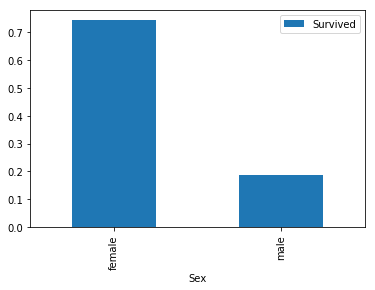

In [49]:
#verificando a coluna sexo
sex_pivot = train.pivot_table(index="Sex",values="Survived") 
sex_pivot.plot.bar()
plt.show()

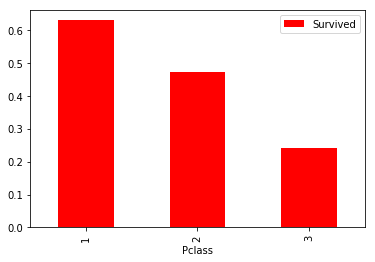

In [50]:

#verificando a coluna Pclass
class_pivot = train.pivot_table(index="Pclass",values="Survived")
class_pivot.plot.bar(color='r') # r para indicar a cor vermelha(red)
plt.show()

In [51]:
#verificando a distribuição de idades no treino
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

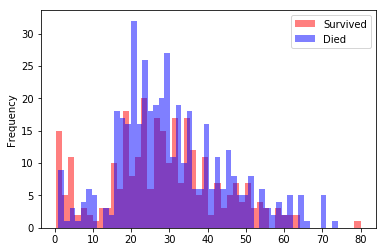

In [52]:
#criando um histograma para visualizar como foi o grau de sobrevivência de acordo com as idades
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [53]:
#para facilitar o trabalhodo algoritmo, vamos criar ranges fixos de idades. 
# e ao mesmo tempo vamos tratar os missing values
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df
 
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
 
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

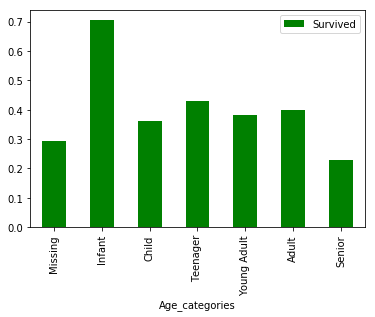

In [54]:
pivot = train.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar(color='g')
plt.show()

In [55]:
#removendo a relação numerica presente na coluna P class
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
 
for column in ["Pclass","Sex","Age_categories"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
#criando um objeto LogistcRegression
lr = LogisticRegression(solver='lbfgs')

In [58]:
#treinando o modelo
columns = ['Pclass_2', 'Pclass_3', 'Sex_male']
lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
#avaliando o modelo
holdout = test
 
from sklearn.model_selection import train_test_split
 
all_X = train[columns]
all_y = train['Survived']
 
train_X, test_X, train_y, test_y = train_test_split(
all_X, all_y, test_size=0.20,random_state=0)

In [61]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, predictions)
 
print(accuracy)

0.7877094972067039


In [63]:
#usando cross validation para um medida de erro mais precisa
from sklearn.model_selection import cross_val_score
 
lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()
 
print(scores)
print(accuracy)

[0.74157303 0.76136364 0.76404494 0.7752809  0.7752809  0.78888889
 0.79775281 0.80898876 0.81111111 0.84269663]
0.7866981613891726


In [64]:
#fazendo previsões usando novos dados
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X,all_y)
holdout_predictions = lr.predict(holdout[columns])

In [65]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [66]:
#retirando os dados irrelevantes
train.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)
test.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [67]:
#fazendo uso dos dummies de novo
new_data_train = pd.get_dummies(train)
new_data_test = pd.get_dummies(test)

In [68]:
new_data_train.isnull().sum().sort_values(ascending = False).head(10)

Age           177
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
Parch           0
SibSp           0
Pclass          0
dtype: int64

In [69]:
#tratando valores nulos encontrados
new_data_train['Age'].fillna(new_data_train['Age'].mean(), inplace = True)
new_data_test['Age'].fillna(new_data_test['Age'].mean(), inplace = True)

In [70]:
new_data_test.isnull().sum().sort_values(ascending = False).head(10)

Fare          1
Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Parch         0
SibSp         0
Age           0
Pclass        0
dtype: int64

In [71]:
new_data_test['Fare'].fillna(new_data_test['Fare'].mean(), inplace = True)

In [72]:
#separado as features para a criação do modelo
X = new_data_train.drop("Survived", axis = 1) #tirando apenas a coluna target 
y = new_data_train["Survived"] # colocando somente a coluna target

In [73]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 3, random_state = 0)
tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [74]:
#avaliando o modelo
tree.score(X,y)

0.8271604938271605

In [75]:
#Enviando a previsão para o Kaggle
previsao = pd.DataFrame()
previsao["PassengerId"] = new_data_test["PassengerId"]
previsao["Survived"] = tree.predict(new_data_test)

In [76]:
previsao.to_csv('previsao.csv',index = False)